<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


<Axes: >

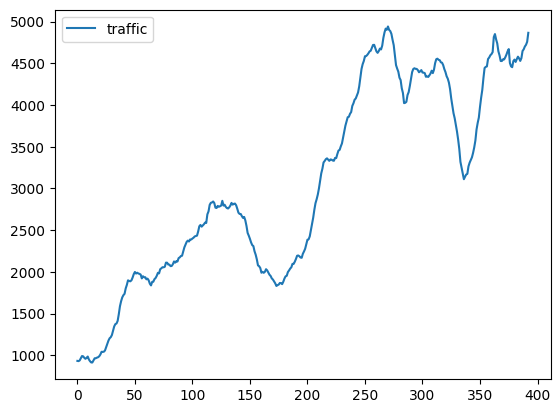

In [35]:
## import data set and just plot it

import pandas as pd

df = pd.read_csv('website_data.csv')
df.info()
df.plot() # the data is non syncronized make it snycronized by np.log method 

In [36]:
df.head()

,traffic
0,932
1,929
2,938
3,964
4,990


In [37]:
import numpy as np
df = np.log(df)
df.head()

,traffic
0,6.837333
1,6.834109
2,6.843750
3,6.871091
4,6.897705


In [38]:
# Train and Test split 
# independent and dependent varriable

mk = (df.index < len(df)-30)
df_train = df[mk].copy()
df_test = df[~mk].copy()

In [39]:
df_train

,traffic
0,6.837333
1,6.834109
2,6.843750
3,6.871091
4,6.897705
...,...
358,8.427050
359,8.432942
360,8.435983
361,8.441176


In [40]:
df_test

,traffic
363,8.486734
364,8.473659
365,8.463370
366,8.443116
367,8.432506
368,8.417815
369,8.417815
370,8.422223
371,8.422003
372,8.427706


In [41]:
len(df)

393

# Step 1: Check for stationarity of time series
Method #1: time series plot
Method #2: ACF plot and PACF plot

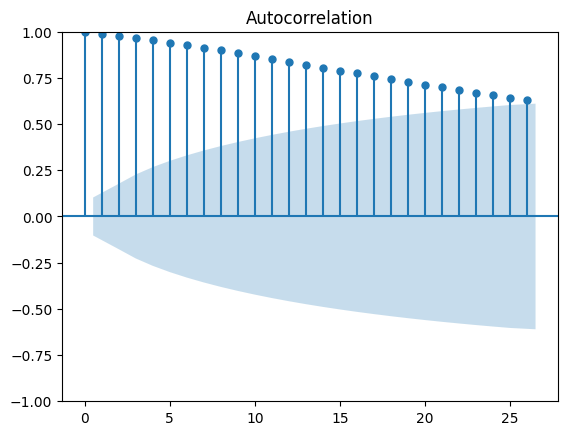

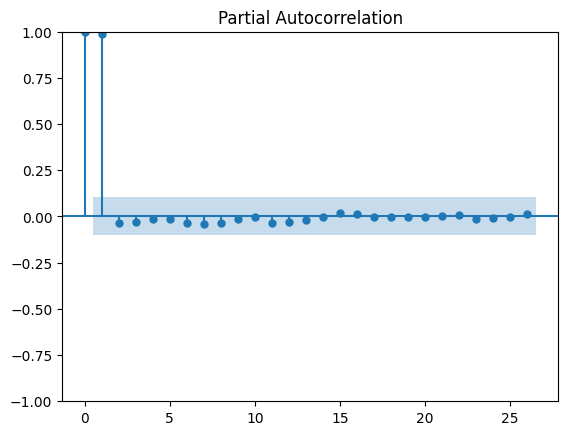

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [43]:
# Check the ADF test score

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')# if p<0.05 data is stationary. If p>0.05 data is non stationary. Trend exist

p-value: 0.2412611608288312


<Axes: >

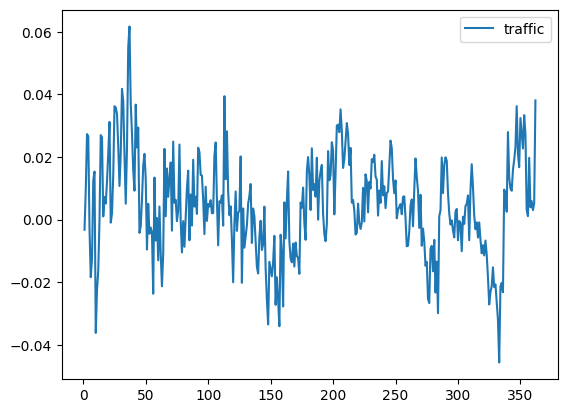

In [44]:
#Transform to stationary: differencing


df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

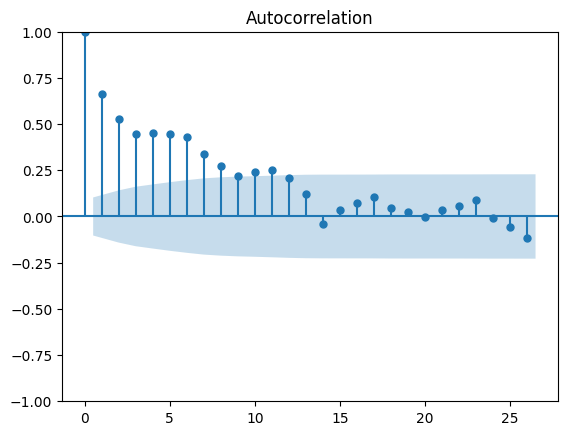

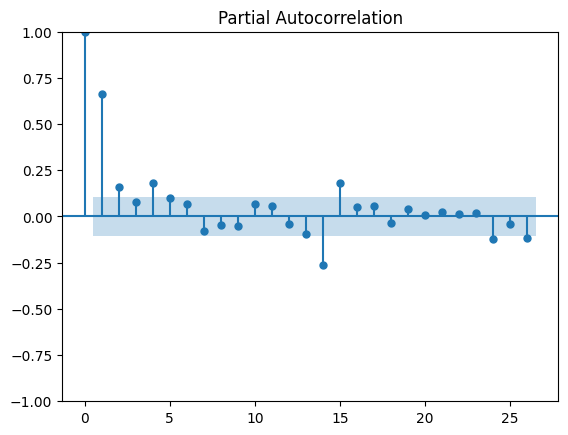

In [45]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

# Step 2: Determine ARIMA models parameters p, q
# Step 3: Fit the ARIMA model


In [46]:
# checek ADF score for diff data

adf_diff_test = adfuller(df_train_diff)
print(f'p-value: {adf_diff_test[1]}')# if p<0.05 data is stationary. If p>0.05 data is non stationary. Trend exist

p-value: 0.02205946123912647


In [47]:
# Fit with Arima

import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary()) #manual arima 

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  363
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1096.369
Date:                Fri, 20 Jun 2025   AIC                          -2186.737
Time:                        08:19:22   BIC                          -2175.063
Sample:                             0   HQIC                         -2182.096
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5806      0.050     11.662      0.000       0.483       0.678
ar.L2          0.1687      0.058      2.903      0.004       0.055       0.283
sigma2         0.0001   8.23e-06     16.612      0.0

# Step 4: Make time series predictions

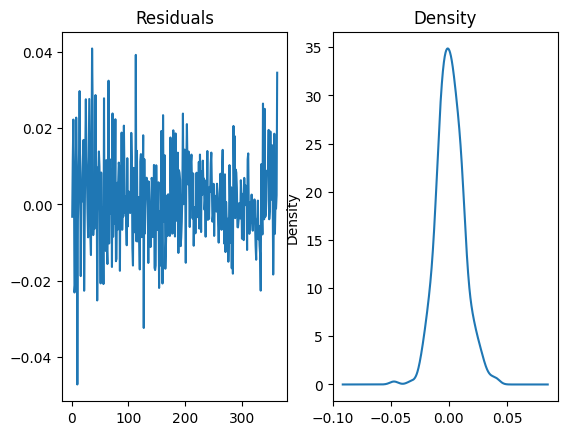

In [49]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show() #residual check 

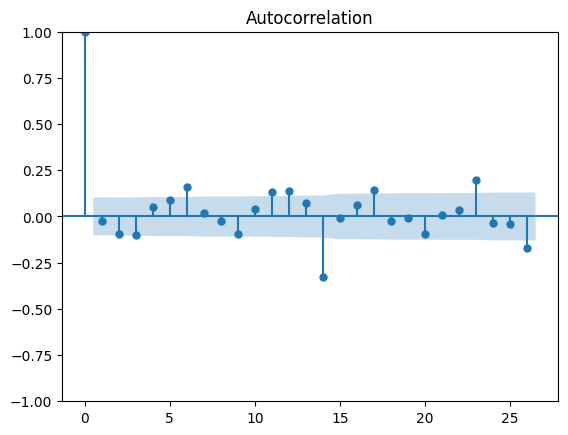

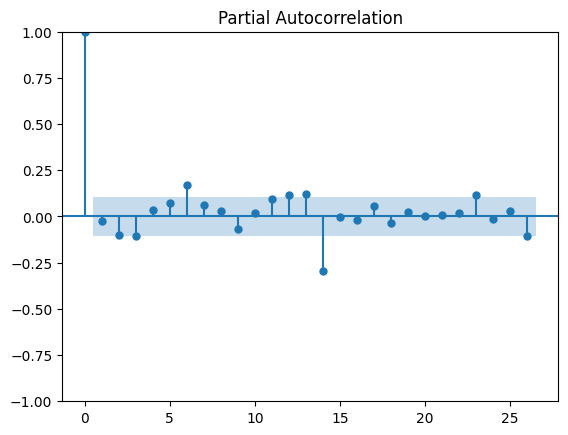

In [50]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<Axes: >

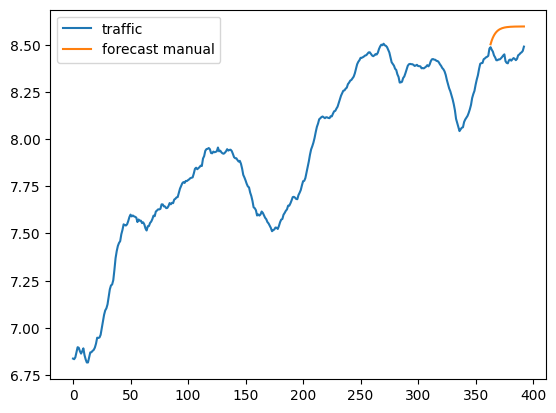

In [54]:
forcast_test = model_fit.forecast(len(df_test))
df['forecast manual'] = [None] * len(df_train) + list(forcast_test)
df.plot()

In [55]:
df.tail()

,traffic,forecast manual
388,8.448272,8.596385
389,8.455531,8.596444
390,8.459776,8.596491
391,8.467372,8.596529
392,8.489822,8.596559


In [56]:
# auto fit arima model

import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima # auto arima 


C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' wa

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

In [57]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(5, 1, 0)   Log Likelihood                1107.360
Date:                Fri, 20 Jun 2025   AIC                          -2200.719
Time:                        08:23:29   BIC                          -2173.478
Sample:                             0   HQIC                         -2189.890
                                - 363                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.001      1.510      0.131      -0.000       0.002
ar.L1          0.5209      0.052      9.973      0.000       0.419       0.623
ar.L2          0.0937      0.065      1.439      0.150      -0.034       0.221
ar.L3         -0.0362      0.064     -0.563      0.573      -0.162       0.090
ar.L4          0.1281      0.053      2.417      0.016       0.024       0.232
ar.L5          0.1018      0.049      2.063      0.039       0.005       0.199
sigma2         0.0001   8.59e-06     14.964      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                11.86
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

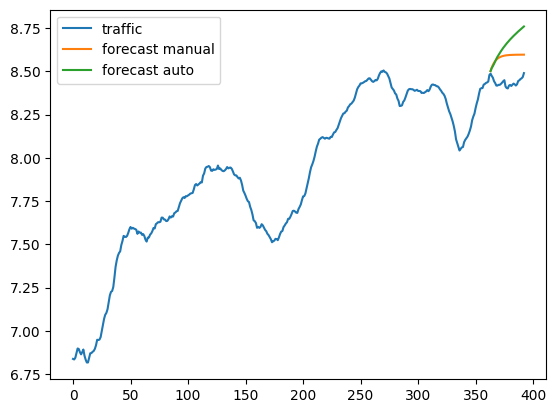

In [59]:
forcast_test_auto = auto_arima.predict(n_periods = len(df_test))
df['forecast auto'] = [None]*len(df_train) +list(forcast_test_auto)
df.plot()

In [64]:
# Evaluation model preditction
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae = mean_absolute_error (df_test, forcast_test)
mape = mean_absolute_percentage_error(df_test, forcast_test)
rmse = np.sqrt(mean_squared_error(df_test, forcast_test))
mse = mean_squared_error(df_test, forcast_test)


print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print(f'mse-manual:{mse}')

mae - manual: 0.14514968388076604
mape - manual: 0.017216198515850756
rmse - manual: 0.15051403899106064
mse-manual:0.022654475933402526


In [65]:
mae = mean_absolute_error(df_test, forcast_test_auto)
mape = mean_absolute_percentage_error(df_test, forcast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forcast_test_auto))
mse = mean_squared_error(df_test,forcast_test_auto)

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')
print(f'mse-auto:{mse}')

mae - auto: 0.21685081928833536
mape - auto: 0.025713635204390038
rmse - auto: 0.23112824939045293
mse-auto:0.0534202676662954
